# Oil Well Profibility Analysis S9

## Introduction:

The success of oil well development relies on selecting the most profitable region while minimizing financial risks. This project aims to analyze geological exploration data and build a predictive model to determine the optimal location for a new oil well. By leveraging machine learning and statistical techniques, the analysis will identify regions with the highest potential for profitability based on estimated oil reserves.

Geological data from three regions provide insights into well characteristics, including multiple features that influence oil yield. The goal is to develop a model that accurately predicts oil reserves in new wells, allowing for strategic selection of the most promising locations. The final decision will be based on profitability calculations, considering both projected revenue and potential risks.

The analysis follows a structured approach: data preprocessing, model training, profit estimation, and risk assessment. Linear regression will serve as the predictive model to estimate oil reserves, as it aligns with the dataset's characteristics. A bootstrapping technique will be used to evaluate risks, ensuring that only regions with an acceptable probability of financial loss are considered. The final selection will prioritize the region with the highest expected profit while maintaining a controlled level of investment risk.

This project provides a data-driven framework for oil well placement, combining predictive modeling with financial analysis to support informed decision-making in the energy sector.


***The data:***
- There are three data sets containing information from three geological explorations, they all contain information:
    - id — unique oil well identifier
    - f0, f1, f2 — three features of points (their specific meaning is unimportant, but the features themselves are significant)
    - product — volume of reserves in the oil well (thousand barrels).

## Data Loading and Preprocessing

- 2.1 Load data from the three regions (geo_data_0.csv, geo_data_1.csv, geo_data_2.csv).
- 2.2 Data Exploration:
    - Check for missing values and basic statistics.
    - Ensure the data is clean and ready for analysis.
- 2.3 Feature Selection:
    - Identify relevant features (f0, f1, f2) and target variable (product).
- 2.4 Take aways

In [369]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import random

### Loading Data from the Three Regions

In [370]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [371]:
#checking for full line duplication
display(data_0.duplicated().sum())
display(data_1.duplicated().sum())
display(data_2.duplicated().sum())

#checking for ID and product combo duplication
display(data_0[['id', 'product']].duplicated().sum())
display(data_1[['id', 'product']].duplicated().sum())
display(data_2[['id', 'product']].duplicated().sum())

0

0

0

0

0

0

In [372]:
def show(df):
    display(df.info())
    display(df.describe())

In [373]:
show(data_0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [374]:
show(data_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [375]:
show(data_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


### Take Aways:
- All three data sets are complete and have no missing values
- There are no duplicated full lines or id & product duplication
- data_0
    - The features (f0, f1, f2) for data_0 show more moderate ranges compared to data_1 and data_2, though there is still potential for outliers in f2, which ranges from -12.09 to 16.00.
    - The target variable (product) has a mean (92.5) close to the median (91.85), indicating a relatively balanced distribution with no extreme outliers, although the maximum value (185.36) suggests some higher reserve volumes exist.
- data_1
    - The features (f0, f1, f2) in this dataset also show potential outliers, especially f0 and f1, which have large standard deviations and wide ranges between minimum and maximum values.
    - The target variable (product) has a mean (68.83) and median (57.09), indicating possible right-skewness due to higher values, but there are no extreme outliers as the max (137.95) is within a reasonable range based on the IQR.
- data_2
    - The features (f0, f1, and f2) have wide ranges with potential outliers, as indicated by the large gaps between their minimum/maximum values and interquartile ranges (IQR).
    - The target variable (product) appears to be normally distributed with no extreme outliers, as its maximum value (190.03) is within a reasonable range based on the IQR.

## Breaking down calc to just data_0

37.5794217150813

array([ 95.89495185,  77.57258261,  77.89263965, ...,  61.50983303,
       118.18039721, 118.16939229])

'The predicted average is 92.59256778438035'

'The valid average is 92.07859674082927'

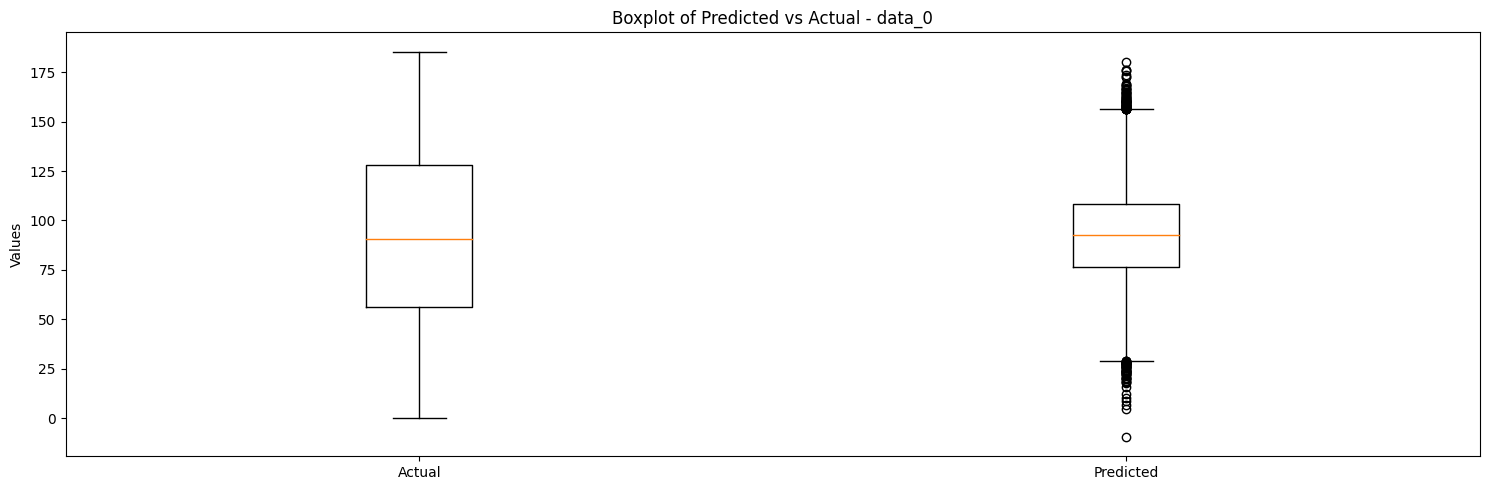

In [376]:
#3.1 
# split into target and feature
features_0_test = data_0.drop(['id', 'product'], axis=1)
target_0_test = data_0['product']

# Split data into train (75%) and valid (25%)
features_train_0t, features_valid_0t, target_train_0t, target_valid_0t = train_test_split(
        features_0_test, target_0_test, test_size=0.25, random_state=12345)

#3.2 Train Linear Regression model
model_0 = LinearRegression()
model_0.fit(features_train_0t, target_train_0t)

#3.3 Calculate predictions for validation set
predicted_valid_0t = model_0.predict(features_valid_0t)
    
# Calculate RMSE
rmse_0t = mean_squared_error(target_valid_0t, predicted_valid_0t) ** 0.5

display(rmse_0t)
display(predicted_valid_0t)

display(f'The predicted average is {predicted_valid_0t.mean()}')
display(f'The valid average is {target_valid_0t.mean()}')

# box plot to compare
plt.figure(figsize=(15, 5))
    

plt.boxplot([target_valid_0t, predicted_valid_0t], labels=['Actual', 'Predicted'])
plt.title(f'Boxplot of Predicted vs Actual - data_0')
plt.ylabel('Values')
        
plt.tight_layout()
plt.show()


In [377]:
#4
#4.1 Constants
total_budget = 100e6  # Total budget in USD for 200 wells
num_wells = 200  # Number of wells to develop
cost_per_well = total_budget / num_wells  # Cost per well
revenue_per_barrel = 4.5  # Revenue from one barrel of raw materials in USD
revenue_per_unit_product = 4500  # Revenue from one unit of product in USD

#4.2
'''Calculate the required reserve volume for a well to avoid losses.
Compare this with the average volume per region.'''
# Step 1: Calculate the required reserve volume for a well to avoid losses
total_revenue_needed = cost_per_well  # Revenue needed to break even
required_reserves_per_well = total_revenue_needed / revenue_per_barrel  # in barrels
required_reserves_per_well_thousands = required_reserves_per_well / 1000  # in thousand barrels

print(f"Cost per well: ${cost_per_well:.2f}")
print(f"Required reserves per well to avoid losses: {required_reserves_per_well_thousands:.2f} thousand barrels")

#step 2: average per region data_0
display(f"The average product in region data_0 is: {data_0['product'].mean()}")

Cost per well: $500000.00
Required reserves per well to avoid losses: 111.11 thousand barrels


'The average product in region data_0 is: 92.50000000000001'

In [378]:
#5.1 profit calculator
profit = []
def calculate_profit(actual_reserves, predicted_reserves):
    predicted_reserves_series = pd.Series(predicted_reserves)
    prediction_sort = predicted_reserves_series.sort_values(ascending=False)
    #select_wells = actual_reserves[prediction_sort.index][num_wells]
    select_wells = actual_reserves.iloc[prediction_sort.index[:num_wells]]
    product = select_wells.sum()
    revenue = product*revenue_per_unit_product
    cost = total_budget
    profit = revenue - cost
    return profit

In [379]:
calculate_profit(target_valid_0t, predicted_valid_0t)

33208260.43139851

In [380]:
#5.2 
#select top 200

# 1. Convert the predicted reserves into a pandas Series for sorting
predicted_reserves_series = pd.Series(predicted_valid_0t)

# 2. Sort the predicted reserves in descending order to get the top wells
prediction_sort = predicted_reserves_series.sort_values(ascending=False)

# 3. Select the top 200 based on the sorted order using iloc
top_200_indices = prediction_sort.index[:200]

# 4. Use iloc to get the actual reserves corresponding to the top 200 predicted wells by position
top_200_actual_reserves = target_valid_0t.iloc[top_200_indices]

# 5. Optional: You can also retrieve the top 200 predicted reserves
top_200_predicted_reserves_0 = predicted_reserves_series.iloc[top_200_indices]

In [381]:
# 5.1 Function to calculate profit using bootstrapping for data_0
def bootstrap_profit_data_0(predicted_reserves, n_samples=1000, random_state=12345):
    state = np.random.RandomState(random_state)
    profits = []

    for i in range(n_samples):
        target_sample = target_0_test.sample(500)
        predicted = model_0.predict(features_0_test)
        predictions_sample = predicted[target_sample.index]
        profit_values = calculate_profit(target_sample, predictions_sample)
        profits.append(profit_values)
        
        #predicted_valid_0t
        
        # Resample the predicted reserves with replacement
        #bootstrapped_reserves = predicted_reserves.sample(500, replace=True, random_state=state)
        
        #sample from target(500)
        #indices from target
        
        # Calculate profit for the bootstrapped reserves
        #profit = calculate_profit(target_valid_0t,bootstrapped_reserves)
        #profits.append(profit)

    return profits

# 5.2 Function to calculate 95% confidence interval and loss risk for data_0
def calculate_risk_and_confidence_interval_data_0(profits, alpha=0.05):
    profits = np.array(profits)
    # Calculate the average profit
    avg_profit = profits.mean()

    # Calculate the 95% confidence interval (lower and upper percentiles)
    lower_bound = np.percentile(profits, alpha / 2 * 100)
    upper_bound = np.percentile(profits, (1 - alpha / 2) * 100)
    
    # Calculate the risk of losses (negative profit)
    loss_risk = (profits < 0).mean() * 100  # Convert to percentage

    return avg_profit, lower_bound, upper_bound, loss_risk

# Apply bootstrapping to predicted reserves for data_0
bootstrap_profits_data_0 = bootstrap_profit_data_0(pd.Series(top_200_predicted_reserves_0))

# Calculate average profit, confidence interval, and loss risk for data_0
avg_profit_data_0, lower_bound_data_0, upper_bound_data_0, loss_risk_data_0 = calculate_risk_and_confidence_interval_data_0(bootstrap_profits_data_0)

# Display the results for data_0
print('Data_0 - Predicted Reserves (Top 200 Wells)')
print(f'Average Profit: ${avg_profit_data_0:,.2f}')
print(f'95% Confidence Interval for Profit: (${lower_bound_data_0:,.2f}, ${upper_bound_data_0:,.2f})')
print(f'Risk of Losses: {loss_risk_data_0:.2f}%')

Data_0 - Predicted Reserves (Top 200 Wells)
Average Profit: $4,183,303.88
95% Confidence Interval for Profit: ($-803,979.09, $9,303,039.59)
Risk of Losses: 4.60%


In [382]:
top_200_predicted_reserves_0.sort_values()

20340    148.365941
24160    148.436761
24051    148.476498
7890     148.481767
7888     148.507064
            ...    
23388    173.299686
11584    175.658429
10015    175.850623
219      176.252213
9317     180.180713
Length: 200, dtype: float64

In [383]:
top_200_actual_reserves.sort_values()

99065     42.092314
32357     58.420650
57385     72.653353
11404     76.184104
54144     88.347788
            ...    
70797    182.225128
24297    182.378042
69887    183.552159
92090    184.095785
79494    184.356455
Name: product, Length: 200, dtype: float64

## Train and Test the Model for Each Region

- 3.1 Split the Data:
    - Use a 75:25 split for training and validation sets.
- 3.2 Train a Linear Regression Model for each region:
    - Model training using LinearRegression.
- 3.3 Evaluate Model:
    - Calculate predictions and evaluate the performance using RMSE (Root Mean Squared Error).
    - Print the average predicted volume and RMSE for each region.
- 3.4 Analyze the Results:
    - Compare the predicted values with actual values and draw conclusions.
    - maybe show a bar graph that shows predicted vs actual for a nice visualization


In [385]:
# Function to split data, train model, and calculate RMSE
def train_and_evaluate(features, target, random_state=12345):
    # Split data: test (25%) and holdout (75%)
    features_test, features_hold, target_test, target_hold = train_test_split(
        features, target, test_size=0.25, random_state=random_state)

    # Split holdout data into train (75%) and valid (25%)
    features_train, features_valid, target_train, target_valid = train_test_split(
        features_hold, target_hold, test_size=0.25, random_state=random_state)
    
    # Train Linear Regression model
    model = LinearRegression()
    model.fit(features_train, target_train)
    
    # Calculate predictions for validation set
    predicted_valid = pd.Series(model.predict(features_valid))
    
    # Calculate RMSE
    rmse = mean_squared_error(target_valid, predicted_valid) ** 0.5
    
    return model, rmse, features_test, target_test

In [387]:
# Prepare datasets
features_0 = data_0.drop(['id', 'product'], axis=1)
features_1 = data_1.drop(['id', 'product'], axis=1)
features_2 = data_2.drop(['id', 'product'], axis=1)

target_0 = data_0['product']
target_1 = data_1['product']
target_2 = data_2['product']

models = {}
results = {}

# Iterate through datasets to train and evaluate models
for i, (features, target) in enumerate([(features_0, target_0), (features_1, target_1), (features_2, target_2)]):
    print(f"Training and evaluating model for data_{i}...")
    
    model, rmse, features_test, target_test = train_and_evaluate(features, target)
    predicted_valid = pd.Series(model.predict(features_test))
    
    models[f'data_{i}'] = {
        'model': model,
        'features_test': features_test,
        'target_test': target_test
    }
    
    results[f'data_{i}'] = {
        'RMSE': rmse,
        'Predicted': predicted_valid.tolist(),
        'Actual': target_test.reset_index(drop=True).tolist()
    }
    
    print(f"RMSE data_{i}: {rmse}")
    print(f"Predicted values for data_{i}: \n{predicted_valid.head().tolist()}\n")

# Create datasets dictionary for recommendation function
datasets = {
    'data_0': (models['data_0']['model'], models['data_0']['features_test'], models['data_0']['target_test']),
    'data_1': (models['data_1']['model'], models['data_1']['features_test'], models['data_1']['target_test']),
    'data_2': (models['data_2']['model'], models['data_2']['features_test'], models['data_2']['target_test']),
}

Training and evaluating model for data_0...
RMSE data_0: 37.64079343294777
Predicted values for data_0: 
[77.98256495661366, 126.91225330591558, 82.68364217628928, 81.76584701364581, 107.41846426204172]

Training and evaluating model for data_1...
RMSE data_1: 0.8860919804048466
Predicted values for data_1: 
[83.51577329742435, 79.6133911321834, 53.833993267502464, 30.497225880688397, 57.80726723214353]

Training and evaluating model for data_2...
RMSE data_2: 40.33932992219369
Predicted values for data_2: 
[86.97893390687015, 70.37758235560719, 101.37155052257556, 78.91483330204602, 112.0716664962548]



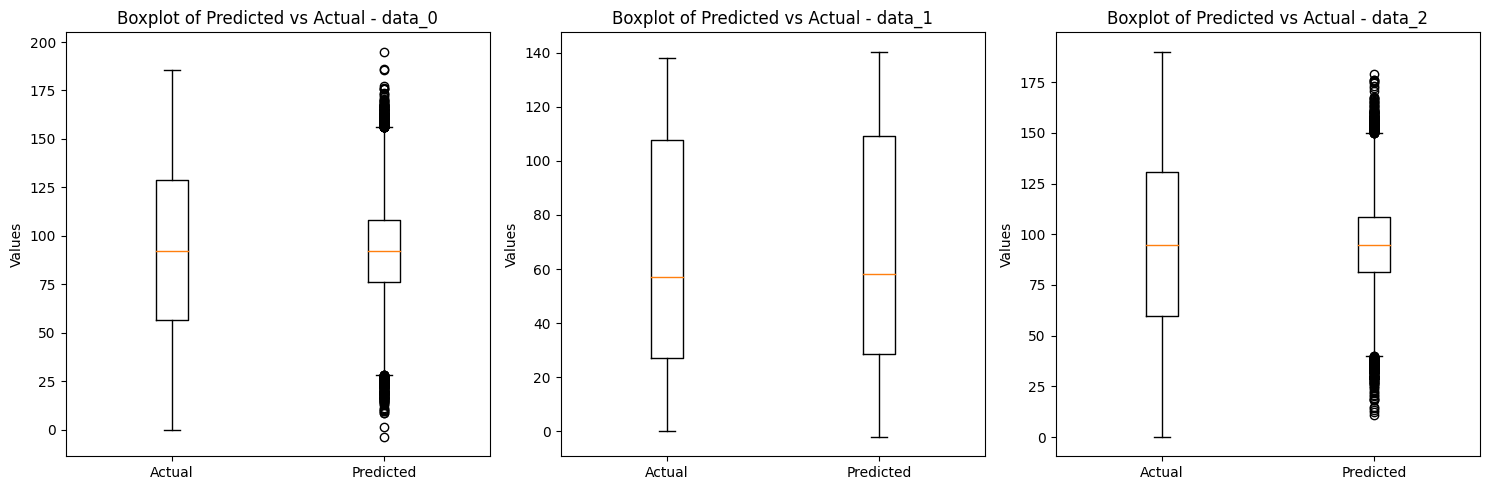

In [390]:
def plot_boxplots(results):
    plt.figure(figsize=(15, 5))
    
    for i, (name, result) in enumerate(results.items()):
        plt.subplot(1, 3, i + 1)
        plt.boxplot([result['Actual'], result['Predicted']], labels=['Actual', 'Predicted'])
        plt.title(f'Boxplot of Predicted vs Actual - {name}')
        plt.ylabel('Values')
        
    plt.tight_layout()
    plt.show()

# Call the boxplot function
plot_boxplots(results)

### Take aways from model training:
***RMSE***
- Data_0 (RMSE = 37.64): The error is relatively high, indicating that the model's predictions for data_0 deviate significantly from the actual values. This suggests that the model is not performing well, or there may be more variance in the target variable.
- Data_1 (RMSE = 0.89): The model for data_1 has a much lower RMSE, which indicates that the predictions are much closer to the actual values. This model is performing better compared to the others.
- Data_2 (RMSE = 40.34): Like data_0, the model for data_2 also has a high RMSE, meaning it’s not performing well in predicting the target variable.

***Predicted vs Actual***
- For data_0, there is a noticeable difference between the distributions of actual and predicted values, indicating that the model might be underestimating or overestimating the target variable.
- In data_1, the predicted values appear to closely follow the distribution of the actual values, suggesting a potentially good fit.
- For data_2, similar to data_0, the predictions seem to deviate more from the actual values, as indicated by the spread and outliers.

## Profit Calculation Preparation

- 4.1 Set Constants:
    - Define key values like:
    - Cost per well (500 wells, 200 selected wells).
    - Revenue per barrel.
- 4.2 Calculate the Threshold:
    - Calculate the required reserve volume for a well to avoid losses.
    - Compare this with the average volume per region.
- 4.3 Findings:
    - Provide insights based on this comparison.


In [391]:
# Constants
total_budget = 100e6  # Total budget in USD for 200 wells
num_wells = 200  # Number of wells to develop
cost_per_well = total_budget / num_wells  # Cost per well
revenue_per_barrel = 4.5  # Revenue from one barrel of raw materials in USD
revenue_per_unit_product = 4500  # Revenue from one unit of product in USD

In [392]:
# Step 1: Calculate the required reserve volume for a well to avoid losses
total_revenue_needed = cost_per_well  # Revenue needed to break even
required_reserves_per_well = total_revenue_needed / revenue_per_barrel  # in barrels
required_reserves_per_well_thousands = required_reserves_per_well / 1000  # in thousand barrels

print(f"Cost per well: ${cost_per_well:.2f}")
print(f"Required reserves per well to avoid losses: {required_reserves_per_well_thousands:.2f} thousand barrels")

Cost per well: $500000.00
Required reserves per well to avoid losses: 111.11 thousand barrels


In [393]:
data_frames = [data_0, data_1, data_2]

In [394]:
#Iterate through each data frame 
for data, name in zip(data_frames, names):
    data['sufficient_reserves'] = data['product'] >= required_reserves_per_well_thousands
    
    regions_with_sufficient_reserves = data[data['sufficient_reserves']]
    regions_below_threshold = data[~data['sufficient_reserves']]
    
    # Calculate and print the average product (volume of reserves)
    average_product = data['product'].mean()
    print(f"Average product (volume of reserves) in {name}: {average_product:.2f} thousand barrels")
    
    # Additional insights
    if not regions_with_sufficient_reserves.empty:
        print(f"Total number of regions with sufficient reserves in {name}: {len(regions_with_sufficient_reserves)}")
    else:
        print(f"No regions have sufficient reserves to avoid losses in {name}.")

    if not regions_below_threshold.empty:
        print(f"Total number of regions below the required reserves threshold in {name}: {len(regions_below_threshold)}")
    else:
        print(f"All regions in {name} meet the required reserves to avoid losses.")

Average product (volume of reserves) in data_0: 92.50 thousand barrels
Total number of regions with sufficient reserves in data_0: 36583
Total number of regions below the required reserves threshold in data_0: 63417
Average product (volume of reserves) in data_1: 68.83 thousand barrels
Total number of regions with sufficient reserves in data_1: 16537
Total number of regions below the required reserves threshold in data_1: 83463
Average product (volume of reserves) in data_2: 95.00 thousand barrels
Total number of regions with sufficient reserves in data_2: 38178
Total number of regions below the required reserves threshold in data_2: 61822


### Take Aways from Profit Calculation

***Average Product (Volume of Reserves):***
- data_0: Average reserves are 92.50 thousand barrels.
- data_1: Average reserves are 68.83 thousand barrels.
- data_2: Average reserves are 95.00 thousand barrels.

***Regions with Sufficient Reserves:***
- data_0: 36,583 regions have sufficient reserves to meet the threshold required to avoid losses.
- data_1: 16,537 regions are above the threshold.
- data_2: 38,178 regions meet the necessary reserve levels.

***Summary:***
- Data_0 and data_2 show promising average reserves (92.50 and 95.00 thousand barrels, respectively), with a significant number of regions having sufficient reserves, indicating potential for profitable drilling operations.
- Data_1 has the lowest average reserves at 68.83 thousand barrels and the highest number of regions below the required threshold, suggesting that this dataset may present the highest risk for losses if investments were made based solely on this data.

## Profit Calculation

- 5.1 Create a Profit Calculation Function:
    - Write a function to compute profit from predicted reserves.
- 5.2 Select Top 200 Wells:
    - Select the 200 wells with the highest predicted reserves.
    - Calculate total reserves and expected profit for each region.
- 5.3 Findings:
    - Suggest which region offers the highest potential profit.


In [395]:
#5.1 profit calculator
profit = []
def calculate_profit(actual_reserves, predicted_reserves):
    predicted_reserves_series = pd.Series(predicted_reserves)
    prediction_sort = predicted_reserves_series.sort_values(ascending=False)
    select_wells = actual_reserves.iloc[prediction_sort.index[:num_wells]]
    product = select_wells.sum()
    revenue = product*revenue_per_unit_product
    cost = total_budget
    profit = revenue - cost
    return profit

In [396]:
def select_top_wells(data, predicted_reserves, actual_reserves, n=200):
    """Selects the top n wells with the highest predicted reserves and calculates profits based on actual reserves."""
    # Convert predicted and actual reserves to pandas Series to use nlargest and other pandas methods
    predicted_reserves_series = pd.Series(predicted_reserves)
    prediction_sort = predicted_reserves_series.sort_values(ascending=False)
    top_200_indices = prediction_sort.index[:200]
    top_200_actual_reserves = actual_reserves.iloc[top_200_indices]
    top_200_predicted_reserves_0 = predicted_reserves_series.iloc[top_200_indices]


    # Calculate total reserves and profit
    total_reserves = top_200_actual_reserves.sum()  # Total actual reserves of selected wells
    total_profit = calculate_profit(actual_reserves, predicted_reserves,)  # Calculate expected profit based on actual reserves
    
    return total_reserves, total_profit


# Profit calculation for each dataset
results_summary = {}

for name, result in results.items():
    predicted_reserves = pd.Series(result['Predicted'])
    actual_reserves = pd.Series(result['Actual'])
    
    # Select top wells and calculate profits
    total_reserves, expected_profit = select_top_wells(result, predicted_reserves, actual_reserves)
    
    # Store results in the summary dictionary
    results_summary[name] = {
        'Total Reserves': total_reserves,
        'Expected Profit': expected_profit
    }

    print(f"Total Reserves for {name}: {total_reserves}")
    print(f"Expected Profit for {name}: {expected_profit}")

Total Reserves for data_0: 30132.673297997215
Expected Profit for data_0: 35597029.840987474
Total Reserves for data_1: 27589.081548181137
Expected Profit for data_1: 24150866.966815114
Total Reserves for data_2: 27909.657436875925
Expected Profit for data_2: 25593458.465941668


***Take Aways:***

- In section 4 the geographic data from data_0 and data_1 showed similar reserves. The region with data_2 has slightly lower total reserves and a significant amount of difference in expected profit. Thus it has fallen out of contention.

## Risk and Profit Analysis with Bootstrapping


- 6.1 Bootstrapping for Profit Estimation:
    - Use the bootstrapping technique with 1000 samples to simulate profit distribution for each region.
- 6.2 Risk and Confidence Interval:
    - Calculate:
        - Average profit.
        - 95% confidence interval.
        - Probability and percentage risk of loss (profit < 0).
- 6.3 Final Recommendation:
    - Suggest the best region based on the highest average profit and risk analysis (regions with loss risk < 2.5%).

In [398]:
def bootstrap_profit_estimation(model, features, target, n_samples=1000, sample_size=500):
    profits = []
    n_data_points = len(target)

    for _ in range(n_samples):
        # Ensure we don't sample more indices than available
        sample_size_actual = min(sample_size, n_data_points)
        
        sample_indices = np.random.choice(n_data_points, sample_size_actual, replace=True)
        predicted_sample = model.predict(features.iloc[sample_indices])
        target_sample = target.iloc[sample_indices]

        # Calculate profit for this bootstrap sample
        profit = calculate_profit(target_sample, predicted_sample)
        profits.append(profit)

    return profits

In [399]:
# 5.2 Function to calculate 95% confidence interval and loss risk for data_0
def calculate_risk_and_confidence_interval(profits, alpha=0.05):
    profits = np.array(profits)
    # Calculate the average profit
    avg_profit = profits.mean()

    # Calculate the 95% confidence interval (lower and upper percentiles)
    lower_bound = np.percentile(profits, alpha / 2 * 100)
    upper_bound = np.percentile(profits, (1 - alpha / 2) * 100)
    
    # Calculate the risk of losses (negative profit)
    loss_risk = (profits < 0).mean() * 100  # Convert to percentage

    return avg_profit, lower_bound, upper_bound, loss_risk

In [400]:
# Function to recommend the best region based on profits and risk
def recommend_best_region(models, datasets, n_samples=1000, sample_size=500):
    region_analysis = {}

    for name, (model, features, target) in datasets.items():
        print(f"\nRunning bootstrapping for region: {name}")
        
        # Perform bootstrapping for each region using the generalized function
        bootstrap_profits = bootstrap_profit_estimation(model, features, target, n_samples, sample_size)

        # Analyze the results
        avg_profit, lower_bound, upper_bound, loss_risk = calculate_risk_and_confidence_interval(bootstrap_profits)

        # Store the analysis for each region
        region_analysis[name] = {
            'avg_profit': avg_profit,
            'conf_interval': (lower_bound, upper_bound),
            'loss_risk': loss_risk
        }

        # Print the results
        print(f"Region: {name}")
        print(f"Average Profit: ${avg_profit:,.2f}")
        print(f"95% Confidence Interval: (${lower_bound:,.2f}, ${upper_bound:,.2f})")
        print(f"Risk of Losses: {loss_risk:.2f}%\n")
    
    # Filter regions with risk of loss less than 2.5%
    valid_regions = {name: res for name, res in region_analysis.items() if res['loss_risk'] < 2.5}

    # Find the region with the highest average profit among the valid regions
    if valid_regions:
        best_region = max(valid_regions.items(), key=lambda x: x[1]['avg_profit'])
        print(f"\nBest region: {best_region[0]} with an average profit of ${best_region[1]['avg_profit']:,.2f}")
    else:
        print("\nNo region meets the risk criteria (risk of loss < 2.5%).")

In [401]:
# Call the function to recommend the best region based on profitability and risk
recommend_best_region(models, datasets)


Running bootstrapping for region: data_0
Region: data_0
Average Profit: $4,355,084.54
95% Confidence Interval: ($-623,890.44, $9,149,373.73)
Risk of Losses: 4.60%


Running bootstrapping for region: data_1
Region: data_1
Average Profit: $4,512,973.30
95% Confidence Interval: ($510,218.73, $8,516,052.56)
Risk of Losses: 1.20%


Running bootstrapping for region: data_2
Region: data_2
Average Profit: $3,717,983.73
95% Confidence Interval: ($-1,815,985.75, $9,315,876.45)
Risk of Losses: 8.50%


Best region: data_1 with an average profit of $4,512,973.30


***Take Aways:***
- Based on the average profits and risk of loss, the best region for developing the oil wells is data_1, which has the highest average profit.

## Conclusions

The analysis of three regions using predictive modeling and financial evaluation has identified Region data_1 as the most optimal location for oil well development.

***Key Findings:***
- ***Profitability:*** Region data_1 has the highest average profit of ***$4,512,973.30***, significantly exceeding the profits of the other regions.
- ***Risk Assessment:*** The risk of losses in data_1 is only ***1.2%***, remaining well below the 2.5% threshold, making it a financially secure investment.
- ***Confidence Interval:*** The 95% confidence interval for profit in data_1 ranges from ***$510,218.73 to $8,516,052.56***, ensuring a positive expected return.
- ***Model Performance:*** The model trained for data_1 achieved the lowest RMSE (***0.89***), indicating higher predictive accuracy compared to data_0 (***37.64***) and data_2 (***40.34***).
- ***Reserves Evaluation:*** While data_2 had the highest average reserves per well (***95,000 barrels***), its high risk of loss (***8.5%***) made it unsuitable. Data_1, despite having lower reserves (***68,830 barrels on average***), exhibited significantly lower financial risk and more consistent profitability.

***Final Decision:***

***Region data_1 should be selected*** for oil well development due to its strong balance of profitability, minimal risk, and superior model accuracy. This ensures a higher likelihood of sustainable returns while maintaining financial security.